<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/01_pytorch_workflow_exercise_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Solutions

The following is **one possible set** (there may be more than one way to do things) of solutions for the 01. PyTorch WorkFlow Exercise template.

You can see more form [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises yourself first!).

In [1]:
# Import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

In [3]:
# Create the data parameters
weight = 0.3
bias = 0.9
start = 0
stop = 1
step = 0.01

# Make X and y using linear regression feature
X = torch.arange(start, stop, step)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])


In [4]:
# Split the data into training and testing
train_split = int(0.8 * len(X)) # 80% for training split
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

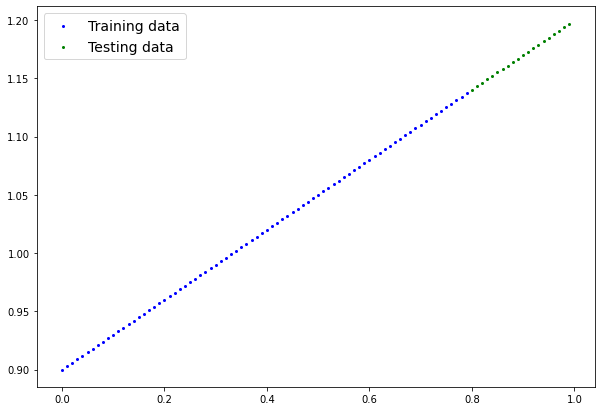

In [5]:
# Plot the training and testing data 
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

plot_predictions();

## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [6]:
## Option 1
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(data=torch.randn(1, 
                                              requires_grad=True,
                                              dtype=torch.float
                                              ))
    
    self.bias = nn.Parameter(data=torch.randn(1, 
                                              requires_grad=True,
                                              dtype=torch.float
                                              ))

  def forward(self, x):
    return self.weight * x + self.bias

## Option 2 (same as above instead using nn.Linear())
# class LinearRegressionModel(nn.Module):
#   def __init__(self):
#     super().__init__()
#     self.linear_layer = nn.Linear(in_features=1, 
#                                   out_features=1)
  
#   def forward(self, x):
#     return self.linear_layer(x)

In [7]:
# Instantiate the model
model = LinearRegressionModel().to(device)
model

LinearRegressionModel()

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [8]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [9]:
# Training loop
torch.manual_seed(42)

# Train model for 300 epochs
epochs = 300

# Send data to device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training

  # Model in train mode
  model.train()

  # 1. Forward pass
  y_preds = model(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_preds, y_train)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context 
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model(X_test)
      # 2. Calculate loss
      test_loss = loss_fn(test_pred, y_test)

      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.966 | Test loss: 1.223
Epoch: 20 | Train loss: 0.735 | Test loss: 0.952
Epoch: 40 | Train loss: 0.504 | Test loss: 0.681
Epoch: 60 | Train loss: 0.273 | Test loss: 0.411
Epoch: 80 | Train loss: 0.059 | Test loss: 0.154
Epoch: 100 | Train loss: 0.035 | Test loss: 0.083
Epoch: 120 | Train loss: 0.028 | Test loss: 0.065
Epoch: 140 | Train loss: 0.021 | Test loss: 0.049
Epoch: 160 | Train loss: 0.014 | Test loss: 0.033
Epoch: 180 | Train loss: 0.007 | Test loss: 0.017
Epoch: 200 | Train loss: 0.009 | Test loss: 0.001
Epoch: 220 | Train loss: 0.009 | Test loss: 0.001
Epoch: 240 | Train loss: 0.009 | Test loss: 0.001
Epoch: 260 | Train loss: 0.009 | Test loss: 0.001
Epoch: 280 | Train loss: 0.009 | Test loss: 0.001


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [10]:
# Make predictions with the model
model.eval()
with torch.inference_mode():
  y_preds = model(X_test)
y_preds[:10]

tensor([1.1283, 1.1313, 1.1342, 1.1371, 1.1400, 1.1430, 1.1459, 1.1488, 1.1518,
        1.1547], device='cuda:0')

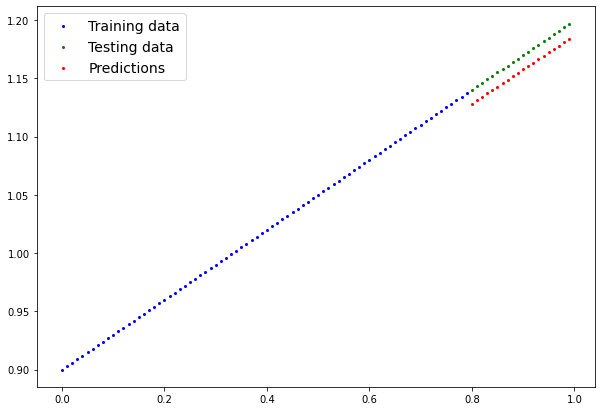

In [11]:
# Plot the predictions
plot_predictions(predictions=y_preds.cpu());

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [12]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_exercises_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_exercises_model.pth


In [13]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model.to(device)

LinearRegressionModel()

In [14]:
# Make predictions with loaded model and compare them to the previous
loaded_model.eval()
with torch.inference_mode():
  loaded_preds = loaded_model(X_test)
y_preds == loaded_preds

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True], device='cuda:0')